# AI-Generated Text Detection - Data Exploration

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your actual path)
data = pd.read_json('../data/HC3_dataset.json')
data.head()


,question,human_answers,chatgpt_answers,index,source
0,"Why is every book I hear about a "" NY Times # ...","[Basically there are many categories of "" Best...",[There are many different best seller lists th...,NaN,reddit_eli5
1,"If salt is so bad for cars , why do we use it ...",[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...,NaN,reddit_eli5
2,Why do we still have SD TV channels when HD lo...,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...,NaN,reddit_eli5
3,Why has nobody assassinated Kim Jong - un He i...,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...,NaN,reddit_eli5
4,How was airplane technology able to advance so...,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...,NaN,reddit_eli5


## Inspect Human vs AI Answers

In [14]:

print(f"Number of rows: {len(data)}")
print(f"Columns: {data.columns.tolist()}")
print("Sample Question:", data['question'].iloc[0])
print("Human Answers:", data['human_answers'].iloc[0])
print("ChatGPT Answers:", data['chatgpt_answers'].iloc[0])


Number of rows: 24322
Columns: ['question', 'human_answers', 'chatgpt_answers', 'index', 'source']
Sample Question: Why is every book I hear about a " NY Times # 1 Best Seller " ? ELI5 : Why is every book I hear about a " NY Times # 1 Best Seller " ? Should n't there only be one " # 1 " best seller ? Please explain like I'm five.
Human Answers: ['Basically there are many categories of " Best Seller " . Replace " Best Seller " by something like " Oscars " and every " best seller " book is basically an " oscar - winning " book . May not have won the " Best film " , but even if you won the best director or best script , you \'re still an " oscar - winning " film . Same thing for best sellers . Also , IIRC the rankings change every week or something like that . Some you might not be best seller one week , but you may be the next week . I guess even if you do n\'t stay there for long , you still achieved the status . Hence , # 1 best seller .', "If you 're hearing about it , it 's because i

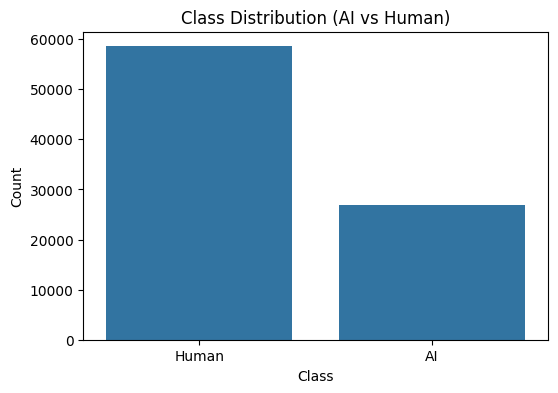

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare class labels for plotting
# We'll count the number of human and AI answers
num_human = data['human_answers'].apply(lambda x: len(x) if isinstance(x, list) else 0).sum()
num_ai = data['chatgpt_answers'].apply(lambda x: len(x) if isinstance(x, list) else 0).sum()

class_labels = ['Human'] * num_human + ['AI'] * num_ai

plt.figure(figsize=(6,4))
sns.countplot(x=class_labels)
plt.title("Class Distribution (AI vs Human)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

/var/folders/ln/6xb675fn0njd8pcg2txc6z1h0000gq/T/ipykernel_33303/2877070331.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), orient='h', palette='viridis')


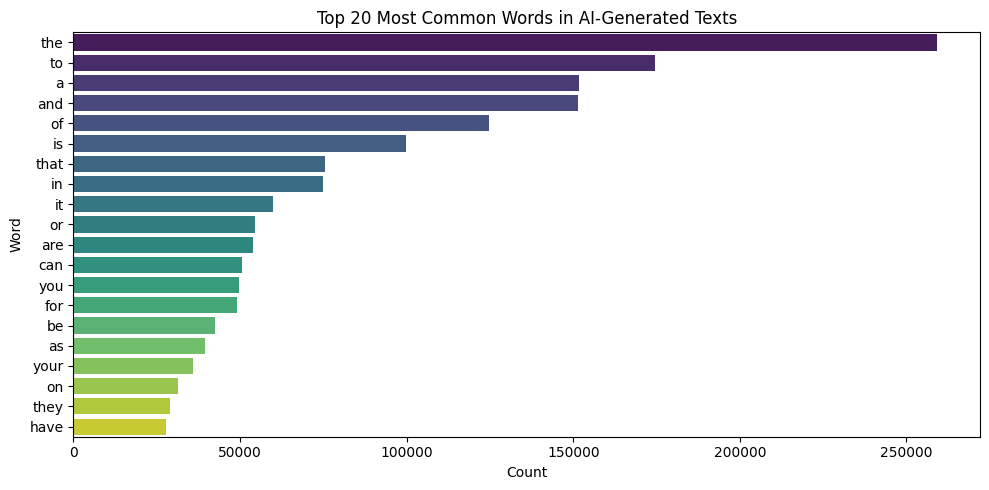

In [16]:
from collections import Counter

# If wordcloud is not available, use a bar plot of most common words instead

# Combine all AI-generated answers into a single list of texts
ai_texts = []
for answers in data['chatgpt_answers']:
    if isinstance(answers, list):
        ai_texts.extend(answers)

# Combine all human answers into a single list of texts (not used here, but for symmetry)
human_texts = []
for answers in data['human_answers']:
    if isinstance(answers, list):
        human_texts.extend(answers)

# Tokenize and count words in AI texts
ai_words = " ".join(ai_texts).lower().split()
ai_word_counts = Counter(ai_words)
most_common_ai = ai_word_counts.most_common(20)

# Plot the 20 most common words in AI-generated texts
if most_common_ai:
    words, counts = zip(*most_common_ai)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), orient='h', palette='viridis')
    plt.title("Top 20 Most Common Words in AI-Generated Texts")
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()
else:
    print("No AI-generated texts found to plot.")

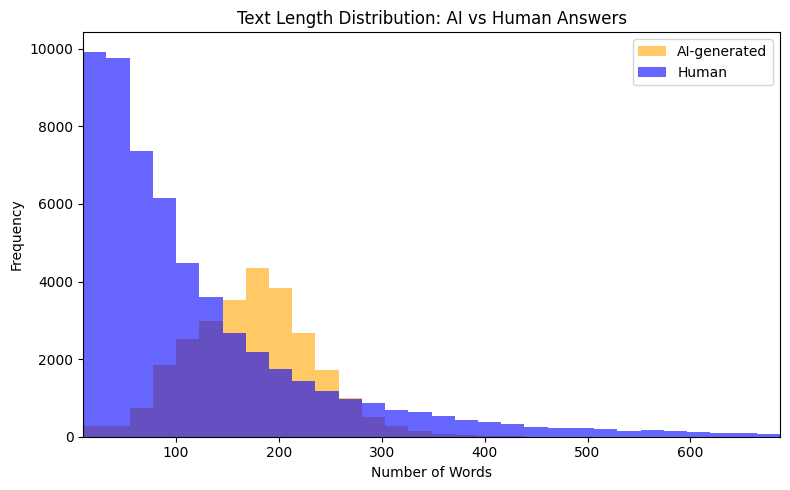

In [19]:
# Plot the distribution of text lengths for AI-generated and human answers

# Calculate text lengths for AI-generated answers
ai_text_lengths = [len(text.split()) for text in ai_texts]

# Calculate text lengths for human answers
human_text_lengths = [len(text.split()) for text in human_texts]

# Limit the x-axis to the 1st and 99th percentiles to avoid long tails
import numpy as np

all_lengths = ai_text_lengths + human_text_lengths
low, high = np.percentile(all_lengths, [1, 99])
low = max(0, int(low))
high = int(high)

plt.figure(figsize=(8,5))
plt.hist(ai_text_lengths, bins=30, color='orange', alpha=0.6, label='AI-generated', range=(low, high))
plt.hist(human_text_lengths, bins=30, color='blue', alpha=0.6, label='Human', range=(low, high))
plt.title("Text Length Distribution: AI vs Human Answers")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.xlim(low, high)
plt.tight_layout()
plt.show()